# Info
This is a notebook for self build linear regression model

From part 8 of the video to part 11 of the video.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

# Creating sample data

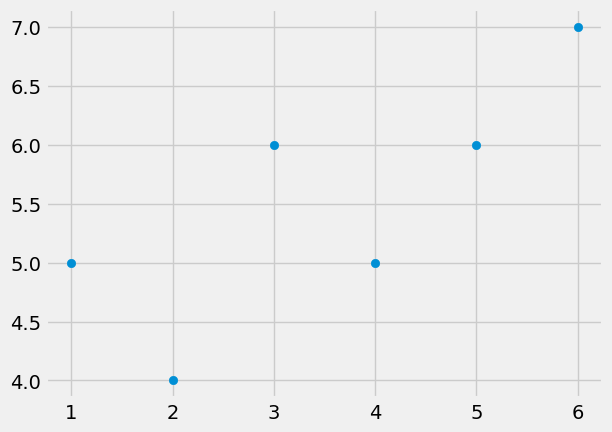

In [2]:
X = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
Y = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)
plt.scatter(X, Y)
plt.show()

# Defining the function

In [3]:
def create_datasets(number, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(number):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

## Get slope function

In [4]:
def best_fit_slope(x, y):
    k = (np.mean(x) * np.mean(y) - np.mean(x * y))/(np.mean(x)**2 - np.mean(x**2))
    return k

## Get intercept Function

In [5]:
def best_fit_intercept(x, y):
    b = np.mean(y) - best_fit_slope(x, y) * np.mean(x)
    return b

In [6]:
X, Y = create_datasets(40, 80, 2, correlation = 'pos')

k = best_fit_slope(X, Y)
b = best_fit_intercept(X, Y)
print(best_fit_slope(X, Y))
print(best_fit_intercept(X, Y))
regression_line = [(k * x) + b for x in X]

2.2312382739212007
5.965853658536588


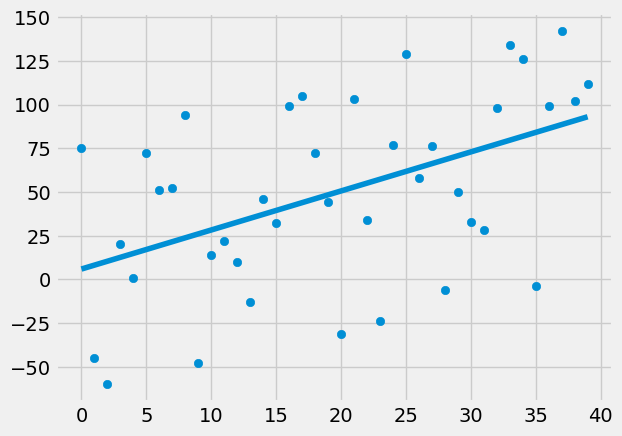

In [7]:
plt.scatter(X, Y)
plt.plot(X, regression_line)
plt.show()

# How to predict

In [8]:
predict_X = 9
predict_Y = k * predict_X + b

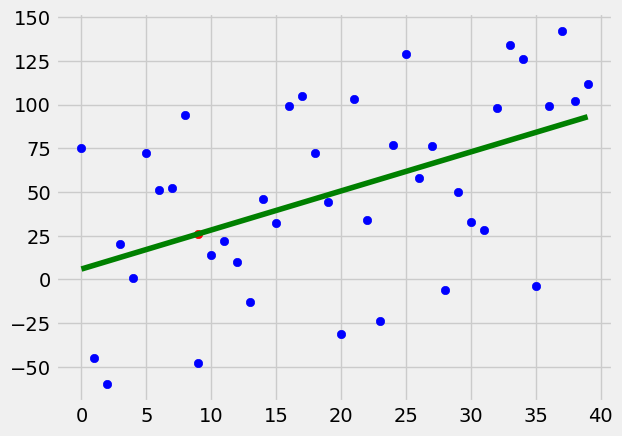

In [9]:
plt.scatter(X, Y, color = 'b')
plt.plot(X, regression_line, color = 'g')
plt.scatter(predict_X, predict_Y, color = 'r')
plt.show()

# Getting the squared error

### Function to calculate the suqared error for both.

In [10]:
def squared_error(line_a, line_b):
    return sum((line_a - line_b) ** 2)

### Function to calculate the R squared

In [11]:
def coefficient_of_determination(line_y, line_y_hat):
    line_y_mean = [np.mean(line_y) for y in line_y]
    sum_of_squared_residuals = squared_error(line_y, line_y_hat)
    total_sum_of_squares = squared_error(line_y, line_y_mean)
    return (1 - ((sum_of_squared_residuals)/(total_sum_of_squares)))

## Run the function to check for accuracy

In [12]:
print(coefficient_of_determination(Y, regression_line))

0.23442889860703575
